In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import sys
import argparse
import os
import numpy as np
from numpy.random import uniform
import pandas as pd
from itertools import product
import datetime
import glob
import re
%matplotlib inline
# %matplotlib notebook
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
# plt.rcParams['figure.figsize'] = (10,5) 
# plt.rcParams['figure.figsize'] = (10,5.625)   # 16:9
plt.rcParams['figure.figsize'] = (10,6.180)    #golden ratio
# plt.rcParams['figure.figsize'] = (10*2,6.180*2)    #golden ratio

In [14]:
def show_images_all(all_data, temp=450, zmax=20, xlabel="xlabel", ylabel="ylabel", mode="2d_z_qw", force=0.0):
    plt.close('all')
    nrows = 4
    fig, ax = plt.subplots(nrows=nrows,ncols=3, figsize=(10*3,6.180*nrows), dpi=200)
    x = 1
    y = 2
    z = 3
    zmin = 0
    zmax=20
    titlefontsize = 28
    test = all_data.query(f"mode == '{mode}'").query(f"temp == '{temp}'").query(f"force == '{force}'")
    origin = test.query("perturbation == 'original'")
    one_change_data = test.query("change == 'rg'")
    up = one_change_data.query("upOrDown == 'p'")
    down = one_change_data.query("upOrDown == 'm'")
    plot_data = [down, origin, up]
    dic_upOrDown = {0:"down", 1:"origin", 2:"up"}
    test = test.query("change != 'none'")
    for idx, (change, one_change_data) in enumerate(test.groupby("change")):
        up = one_change_data.query("upOrDown == 'p'")
        down = one_change_data.query("upOrDown == 'm'")
        plot_data = [down, origin, up]
        for image_idx, pddata in enumerate(plot_data):
            data = pddata[["index", "x","y","f"]].values
    #         print(data)
            data = data[~np.isnan(data).any(axis=1)] # remove rows with nan
            data = data[~(data[:,z] > zmax)] # remove rows of data for z not in [zmin zmax]
            data = data[~(data[:,z] < zmin)]

            xi = np.linspace(min(data[:,x]), max(data[:,x]), 20)
            yi = np.linspace(min(data[:,y]), max(data[:,y]), 20)
            zi = griddata((data[:,x], data[:,y]), data[:,z], (xi[None,:], yi[:,None]), method='linear')
            # plt.contour(xi, yi, zi, 50, linewidths=0.25,colors='k')
            jet = cm = plt.get_cmap('jet')
    #         print(jet)
            # plt.contourf(xi, yi, zi, 20, cmap='rainbow')
    #         plt.figure()
            cs = ax[idx,image_idx].contourf(xi, yi, zi, 30, cmap='jet')
            # plt.xlim(xmin, xmax)
            cs.set_clim(zmin, zmax)
    #         fig.clim()
            ax[idx,image_idx].set_title(f"{change}: {dic_upOrDown[image_idx]}", fontsize = titlefontsize)
        fig.colorbar(cs, ax=ax[idx,2], shrink=1)
#     fig.colorbar()
    fig.suptitle(f'temp = {temp}', y=1.02, fontsize = titlefontsize*1.5)
#     fig.subplots_adjust(top=1.02)
    fig.tight_layout()

In [15]:
all_data = pd.read_feather("/Users/weilu/Research/data/pulling/19_Feb_data_1.feather")

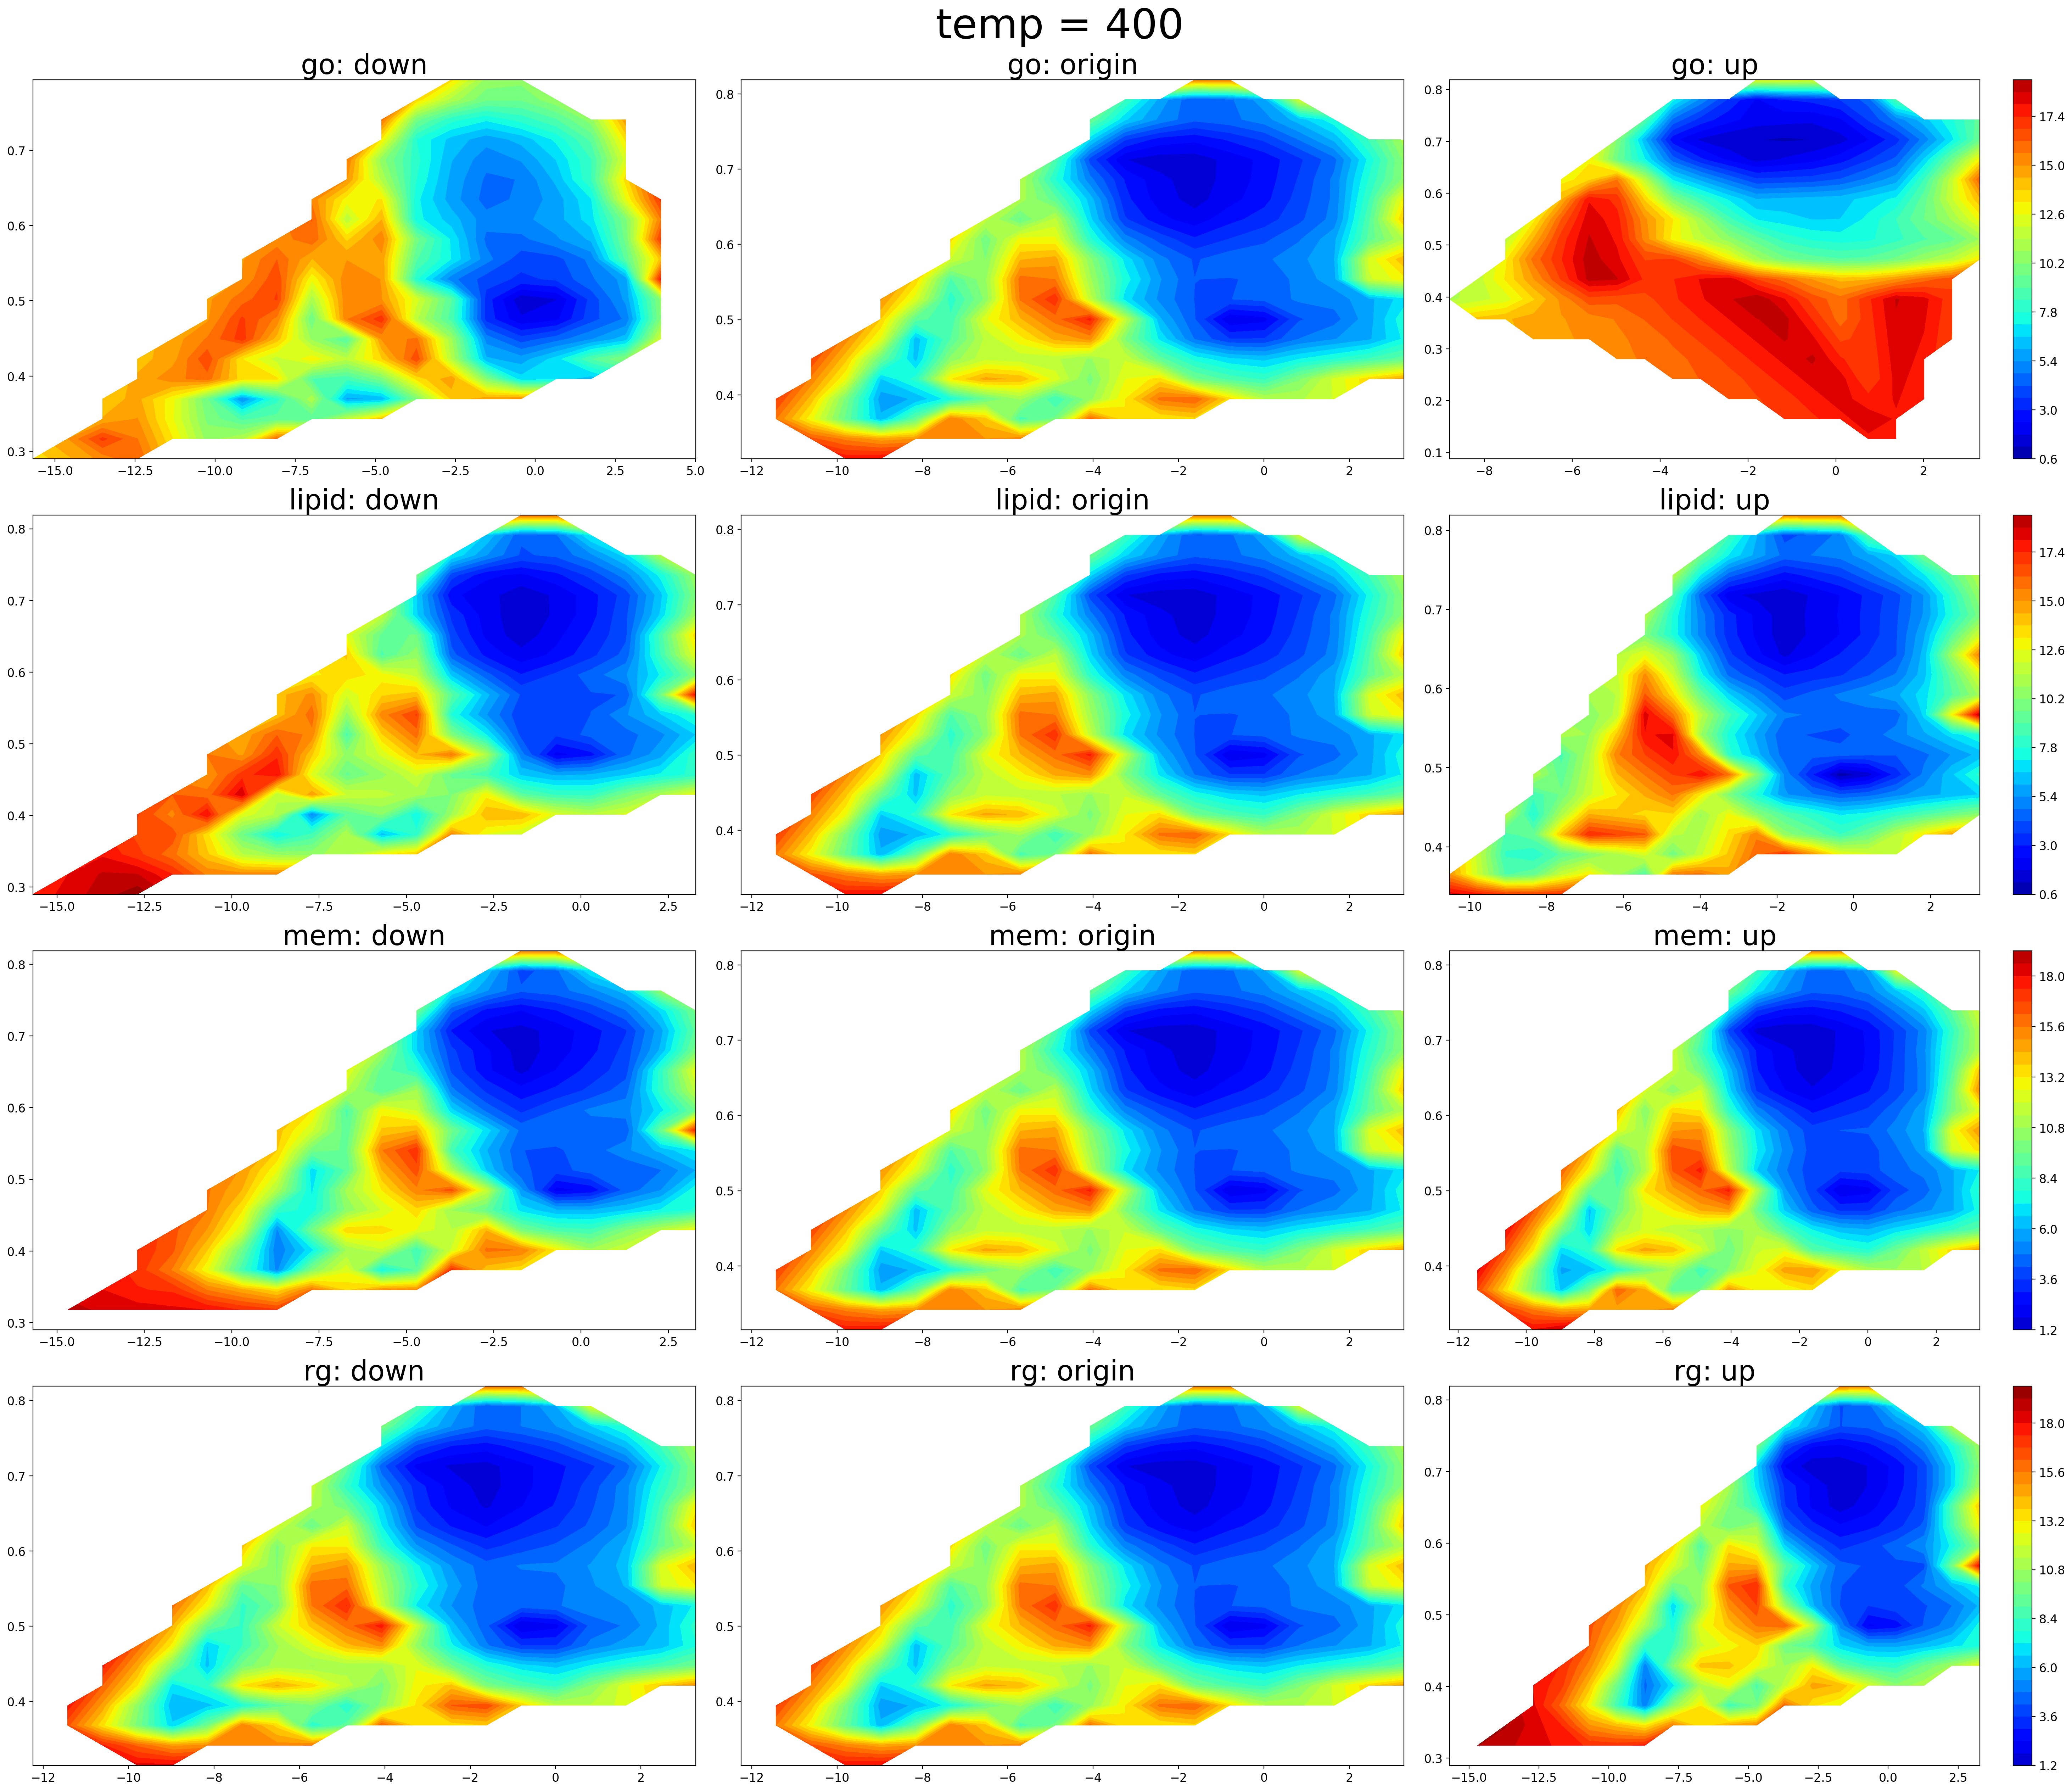

In [16]:
show_images_all(all_data, temp=400, mode="2d_z_qw", zmax=40)